# Exam 28th of August 2024, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [1]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl

---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the below density using **rejection** sampling:

$$
    f[x] = C (\sin(x))^{10}
$$
for $0 \leq x \leq \pi$, where $C$ is a value such that $f$ above is a density (i.e. integrates to one). Hint: you do not need to know the value of $C$ to perform rejection sampling.

2. [2p] Produce 10000 samples (**use fewer if it takes too long**) and put the answer in `problem1_samples` from the above distribution and plot the histogram. 
3. [2p] Define $X$ as a random variable with the density given in part 1. Denote $Y = \left ( X - \frac{\pi}{2} \right)^2$ and use the above 10000 samples to estimate
$$
    \mathbb{E}[Y]
$$
and store the result in `problem1_expectation`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Can you calculate an approximation of the value of $C$ from part 1 using random samples? Provide a plot of the histogram from part 2 together with the true density as a curve, recall that this requires the value of $C$. Explain what method you used and what answer you got.

In [6]:

# Part 1

def problem1_rejection(n_samples=1):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment
    # Step 2: Define the proposal distribution
        # Step 1: Define the unnormalized target density
    def target_density(x):
        return (np.sin(x))**10
    
    def proposal_sample():
        return np.random.uniform(0, np.pi)  # Uniform distribution on [0, pi]

    def proposal_density(x):
        return 1 / np.pi  # Constant density of uniform distribution

    
     # Step 3: Determine the envelope constant M
    x_test = np.linspace(0, np.pi, 1000)
    M = max(target_density(x_test) / proposal_density(x_test))  # Maximum ratio， 2/pi
    

    # Step 4: Perform rejection sampling
    samples = []
    while len(samples) < n_samples:
        x = proposal_sample()  # Sample from the proposal distribution
        u = np.random.uniform(0, 1)  # Random number for acceptance check
        if u <= target_density(x) / (M * proposal_density(x)):
            samples.append(x)  # Accept the sample

    return np.array(samples)
    

samples:  [1.86724749 1.29293591 1.40908222 ... 1.5062159  1.57912448 1.2657446 ]


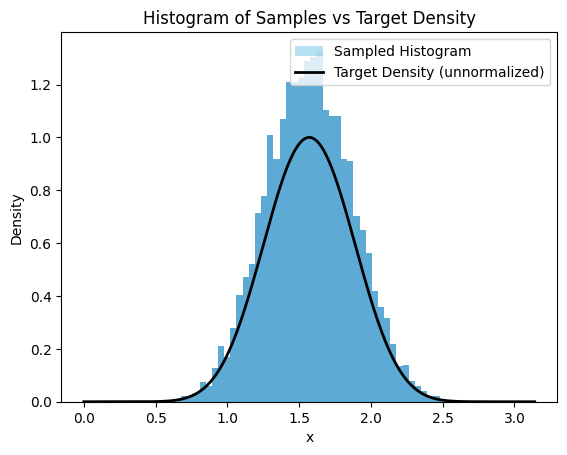

In [4]:
# Part 2

problem1_samples = problem1_rejection(n_samples=10000)
print("samples: ", problem1_samples)
# Plot the histogram of samples
plt.hist(problem1_samples, bins=50, density=True)


# 绘制样本的直方图
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, color= 'skyblue', label='Sampled Histogram')

# 绘制目标分布的曲线
x = np.linspace(0, np.pi, 1000)  # 生成横坐标
plt.plot(x, (np.sin(x))**10, label='Target Density (unnormalized)', linewidth=2,color='black')

# 添加图例和标签
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of Samples vs Target Density")

# 显示图像
plt.show()


In [5]:
# Part 3
# 定义Y
Y_samples = (problem1_samples - (np.pi / 2))**2
# 估计E[Y]
problem1_expectation = np.mean(Y_samples)
print("Expectation of Y: ", problem1_expectation)


Expectation of Y:  0.09191048333148133


In [49]:
import numpy as np

# Part 4: 使用 Hoeffding 不等式计算置信区间
confidence_level = 0.95  # 置信水平
remaining_prob = 1 - confidence_level  # 剩余概率 1 - 置信水平
n = len(Y_samples)  # 样本数量

# 计算 Y 的范围 (b - a)
a = 0  # Y 的最小值
b = (np.pi / 2) ** 2  # Y 的最大值
range_ba = b - a  # Y 的取值范围

# 根据 Hoeffding 不等式计算 epsilon，包括 (b - a)^2
epsilon = np.sqrt((range_ba ** 2) * np.log(2 / remaining_prob) / (2 * n))
print(f"epsilon: {epsilon}")

# 根据 epsilon 计算置信区间的上下界
lower_bound = float(problem1_expectation - epsilon)  # 下界
upper_bound = float(problem1_expectation + epsilon)  # 上界
problem1_interval = (lower_bound, upper_bound)  # 保存置信区间

# 输出结果
print(f"95% 置信区间: {problem1_interval}")


epsilon: 0.033509811742199365
95% 置信区间: (0.058400671589281965, 0.1254202950736807)


In [7]:
# Part 5
# 第 4 问：使用蒙特卡罗积分估算归一化常数 C
def estimate_C(n_samples=10000):
   
    # 从均匀分布 [0, π] 中采样
    uniform_samples = np.random.uniform(0, np.pi, n_samples)

    # 计算目标函数 (sin(x))^10 在样本上的平均值并近似积分
    integral_estimate = np.mean((np.sin(uniform_samples))**10) * np.pi

    # C 是积分的倒数
    C_estimate = 1 / integral_estimate
    return C_estimate

# 调用函数估算 C
problem1_C = estimate_C()
print(f"估算得到的归一化常数 C: {problem1_C}")

估算得到的归一化常数 C: 1.3038691710806634


/Users/macbook/Desktop/Jaden/s1/s1-p2/review/Review_DS/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Desktop/Jaden/s1/s1-p2/review/Review_DS/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Desktop/Jaden/s1/s1-p2/review/Review_DS/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/Desktop/Jaden/s1/s1-p2/review/Review_DS/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

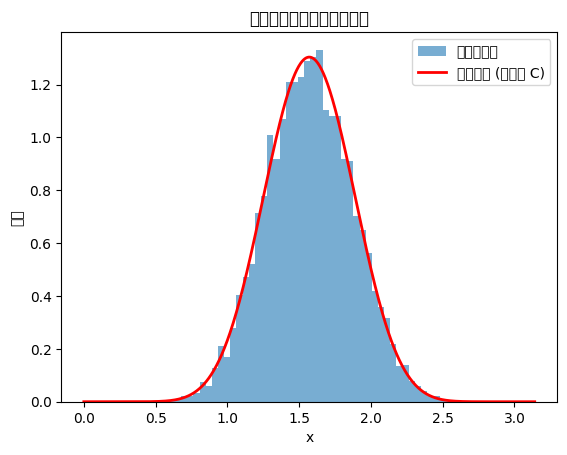

In [8]:
# Part 5

# Write your code to produce the plot here
# 绘制直方图和真实密度曲线
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, label='样本直方图')  # 样本直方图

# 绘制真实密度曲线（使用估算的 C）
x = np.linspace(0, np.pi, 1000)  # 生成 [0, π] 的点用于绘图
true_density = problem1_C * (np.sin(x))**10  # 计算真实密度
plt.plot(x, true_density, label='真实密度 (估算的 C)', color='red', linewidth=2)  # 绘制真实密度曲线

# 添加图例和标题
plt.legend()
plt.xlabel("x")
plt.ylabel("密度")
plt.title("样本直方图与真实密度对比")

# 显示图像
plt.show()
#XXXXXXX

# Part 5

**Double click this cell and directly edit below to answer part 5**

### Begin explanation

Bla di bla

### End explanation

---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [9]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_rejection(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_expectation, float)) 
except:
    print("Try again. your problem1_expectation is not a float")
else:
    print("Good, your problem1_expectation is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

Good, your problem1_rejection returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_expectation is a float
Good, your problem1_interval is a tuple or list of length 2


---
## Exam vB, PROBLEM 2
Maximum Points = 13


Consider the dataset `CORIS.csv` that you find in the data folder. The data set `CORIS.csv` contains cases of coronary heart disease (CHD) and variables associated with the patient's condition: systolic blood pressure, yearly tobacco use (in kg), low density lipoprotein (Idl), adiposity, family history (0 or 1), type A personality score (typea), obesity (body mass index), alcohol use, age, and the diagnosis of CHD (0 or 1).
In this dataset the `X` corresponds to the measurements. The `Y` is a 0-1 label where 1 represents CHD and 0 does not. The code to load the data is prepared and so is the train-test-validation split and the training of the model. The model is stored in `problem2_pipe` which is a Pipeline object as often used in composite models in sklearn, you will find in the cell corresponding to the different parts, some sample code how to use the model.

1. [3p] Use Hoeffdings inequality and compute the intervals for precision-recall etc. on the test set with 95% confidence.
2. [3p] You are interested in minimizing the average cost of your classifier. The hospital wants to use your model as a screening tool, that is, if it finds that someone is classified as CHD we interpret this as further investigation needs to take place, otherwise we do noting. After some deliberations you come to the conclusion that the following "costs" should be used (note, this is all imaginary at this point),
    * If someone has coronary heart disease but classified as not, we say it costs 300 **(this is the worst scenario)** 
    * If someone does not have coronary heart disease but classified as having it, we say it costs 10 **(this is less bad than the above issue)**
    * If someone has coronary heart disease but classified as having it, costs 0 **(We did the right thing, no cost)**
    * If someone does not have coronary heart disease but classified as not, costs 0 **(We did the right thing, no cost)**.

complete filling the function `cost` to compute the cost of a prediction model under a certain prediction threshold (recall our precision recall lecture and the `predict_proba` function from the LogisticRegression (code provided)). 

3. [4p] Now, we wish to select the threshold of our classifier that minimizes the cost, we do that by checking say 100 evenly spaced proposal thresholds between 0 and 1. Compute the optimal threshold using the testing data and calculate the cost at the chosen threshold using the testing data.
4. [3p] With your newly computed threshold value, compute the cost of putting this model in production by computing the cost using the validation data. Also provide a confidence interval of the cost using Hoeffdings inequality with a 99% confidence.

In [8]:
# RUN THIS CELL TO LOAD THE DATA AND SPLIT IT INTO TRAINING, TEST AND VALIDATION SETS
# FINALLY IT TRAINS THE MODEL AS A PIPELINE

# 导入必要的库
import pandas as pd  # 用于加载和处理数据
from sklearn.model_selection import train_test_split  # 用于数据集划分

# 读取 CORIS 数据集，跳过前两行（假设这两行是说明性内容或无关数据）
CORISDataset = pd.read_csv("data/CORIS.csv", skiprows=[1, 2])

# 将数据集分为特征 (X) 和目标变量 (Y)
problem2_X = CORISDataset[['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']].values  
# problem2_X 包含特征：收缩压、年度烟草使用量、低密度脂蛋白、脂肪率、家族病史、A 型性格分数、肥胖指数、酒精使用量和年龄

problem2_Y = CORISDataset['chd'].values  
# problem2_Y 是目标变量，表示是否患有冠心病 (CHD)，值为 0 或 1

# 将数据集划分为训练集 (60%)、测试集 (20%) 和验证集 (20%)
problem2_X_train, X_tmp, problem2_Y_train, Y_tmp = train_test_split(
    problem2_X, problem2_Y, train_size=0.6, random_state=42
)
# 训练集 (60%)：用于训练模型
# 临时集 (40%)：后续将进一步划分为测试集和验证集

problem2_X_test, problem2_X_val, problem2_Y_test, problem2_Y_val = train_test_split(X_tmp, Y_tmp, train_size=0.5, random_state=42)
# 测试集 (20%)：用于评估模型的性能
# 验证集 (20%)：用于模型调优（例如超参数优化）

# 输出数据的形状，帮助我们确认数据划分是否正确
print(problem2_X_train.shape, problem2_Y_train.shape, problem2_X_test.shape, problem2_Y_test.shape, problem2_X_val.shape, problem2_Y_val.shape)
# 输出示例：
# (362, 9) (362,) (121, 9) (121,) (121, 9) (121,)
# 含义：
# - 训练集有 362 个样本，每个样本有 9 个特征，目标变量有 362 个标签
# - 测试集和验证集各有 121 个样本

# 导入必要的模块
from sklearn.pipeline import Pipeline  # 用于创建管道
from sklearn.preprocessing import StandardScaler  # 用于特征标准化
from sklearn.linear_model import LogisticRegression  # 逻辑回归模型

# 创建一个包含标准化器和逻辑回归模型的管道
problem2_pipe = Pipeline([
    ('scaler', StandardScaler()),  # 标准化步骤，将特征缩放到均值为 0，方差为 1
    ('logreg', LogisticRegression(random_state=42))  # 逻辑回归模型，用于二分类任务
])

# 用训练集数据拟合管道（即训练模型）
problem2_pipe.fit(problem2_X_train, problem2_Y_train)
# 标准化器会先对训练集特征进行缩放
# 逻辑回归模型随后在缩放后的特征上进行训练


(277, 9) (277,) (92, 9) (92,) (93, 9) (93,)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=42))])

In [35]:
# Part 1

# To make a prediction on a dataset `X` you can use the following code
# predictions = problem2_pipe.predict(X)
# That is, as with any other sklearn model, you can use the `predict` method

# Each precision and recall should be a tuple, for instance you can write
# precision0 = (0.9,0.95)
# the 0 or 1 in the variable name indicates the class

from sklearn.metrics import precision_score, recall_score, classification_report
# 使用模型预测
predictions = problem2_pipe.predict(problem2_X_test)

# 计算类别 0 和类别 1 的 Precision 和 Recall
precision0 = precision_score(problem2_Y_test, predictions, pos_label=0)
recall0 = recall_score(problem2_Y_test, predictions, pos_label=0)
precision1 = precision_score(problem2_Y_test, predictions, pos_label=1)
recall1 = recall_score(problem2_Y_test, predictions, pos_label=1)
print(classification_report(problem2_Y_test, predictions))

# 定义 Hoeffding's 不等式置信区间计算函数
def compute_hoeffding_ci(estimation, n, confidence=0.95):
    """
    使用 Hoeffding's 不等式计算置信区间
    :param estimation: 指标值 (precision 或 recall)
    :param n: 样本数量
    :param confidence: 置信水平，默认为 95%
    :return: (下界, 上界) 的置信区间
    """
    delta = 1 - confidence
    epsilon = np.sqrt(np.log(2 / delta) / (2 * n))  # Hoeffding’s 不等式
    print(epsilon)
    lower_band = estimation - epsilon  
    upper_band = estimation + epsilon 
    return (float(lower_band), float(upper_band))  # 转为 Python 原生 float

# 计算样本数量
n_precision0 = np.sum(predictions == 0)  # 预测为 0 的样本数
n_recall0 = np.sum(problem2_Y_test == 0)  # 实际为 0 的样本数
n_precision1 = np.sum(predictions == 1)  # 预测为 1 的样本数
n_recall1 = np.sum(problem2_Y_test == 1)  # 实际为 1 的样本数

# 计算 Precision 和 Recall 的置信区间
problem2_precision0 = compute_hoeffding_ci(precision0, n_precision0)
problem2_recall0 = compute_hoeffding_ci(recall0, n_recall0)
problem2_precision1 = compute_hoeffding_ci(precision1, n_precision1)
problem2_recall1 = compute_hoeffding_ci(recall1, n_recall1)

# 输出结果
print(f"Precision for class 0 (with CI): {problem2_precision0}")
print(f"Recall for class 0 (with CI): {problem2_recall0}")
print(f"Precision for class 1 (with CI): {problem2_precision1}")
print(f"Recall for class 1 (with CI): {problem2_recall1}")





# The code below will check that you supply the proper type
assert(type(problem2_precision0) == tuple)
assert(len(problem2_precision0) == 2)
assert(type(problem2_recall0) == tuple)
assert(len(problem2_recall0) == 2)
assert(type(problem2_precision1) == tuple)
assert(len(problem2_precision1) == 2)
assert(type(problem2_recall1) == tuple)
assert(len(problem2_recall1) == 2)


              precision    recall  f1-score   support

           0       0.77      0.84      0.80        58
           1       0.68      0.56      0.61        34

    accuracy                           0.74        92
   macro avg       0.72      0.70      0.71        92
weighted avg       0.73      0.74      0.73        92

0.16976268946757742
0.17832746549328307
0.25665706184496795
0.2329124884294129
Precision for class 0 (with CI): (0.5958623105324226, 0.9353876894675774)
Recall for class 0 (with CI): (0.6665001207136135, 1.0231550517001797)
Precision for class 1 (with CI): (0.42191436672646065, 0.9352284904163966)
Recall for class 1 (with CI): (0.3259110409823518, 0.7917360178411776)


In [36]:
# Part 2
def problem2_cost(model, threshold, X, Y):
    """
    计算模型在特定预测阈值下的平均成本 (使用 for 循环逐一计算)
    :param model: 已训练好的模型 (LogisticRegression 或类似模型)
    :param threshold: 预测阈值
    :param X: 特征矩阵
    :param Y: 真实标签
    :return: 平均成本（cost per person）
    """
    # 获取样本属于类别 1 (CHD) 的预测概率
    pred_proba = model.predict_proba(X)[:, 1]
    
    # 根据阈值将概率转为类别预测
    predictions = (pred_proba >= threshold) * 1  # 转为二分类 (1 或 0)
    print(pd.Series(predictions).value_counts())
    
    # 成本定义
    FN_cost = 300  # 假负例成本
    FP_cost = 10   # 假正例成本
    
    # 初始化总成本
    total_cost = 0
    
    # 遍历每个样本，逐一计算成本
    for i in range(len(Y)):
        if Y[i] == 1 and predictions[i] == 0:  # False Negative
            total_cost += FN_cost
        elif Y[i] == 0 and predictions[i] == 1:  # False Positive
            total_cost += FP_cost
    
    # 计算平均成本
    average_cost = total_cost / len(Y)
    return average_cost


print(problem2_cost(problem2_pipe, 0.5, problem2_X_val, problem2_Y_val))   
    # Fill in what is missing to compute the cost and return it
    # Note that we are interested in average cost (cost per person)
    

0    72
1    21
Name: count, dtype: int64
52.1505376344086


In [30]:
# Part 3

# 初始化变量
problem2_optimal_threshold = None
problem2_cost_at_optimal_threshold = None

# 生成 100 个候选阈值
thresholds = np.linspace(0, 1, 100)

# 存储每个阈值的成本
costs = []

# 遍历每个候选阈值，计算成本
for threshold in thresholds:
    cost = problem2_cost(problem2_pipe, threshold, problem2_X_test, problem2_Y_test)
    costs.append(cost)

# 找到最优阈值和对应的最小成本
min_cost_index = np.argmin(costs)  # 找到成本最小的索引
problem2_optimal_threshold = thresholds[min_cost_index]  # 最优阈值
problem2_cost_at_optimal_threshold = costs[min_cost_index]  # 对应的最小成本
# 输出结果
print(f"最优阈值: {problem2_optimal_threshold}")
print(f"最优阈值下的平均成本: {problem2_cost_at_optimal_threshold}")

最优阈值: 0.07070707070707072
最优阈值下的平均成本: 5.217391304347826


In [37]:
# Part 4

# 使用验证集计算在最优阈值下的平均成本
problem2_cost_at_optimal_threshold_validation = problem2_cost(
    problem2_pipe, 
    problem2_optimal_threshold, 
    problem2_X_val, 
    problem2_Y_val
)

# 计算 Hoeffding’s 不等式的置信区间
def compute_hoeffding_ci(estimation, n, confidence=0.99):
    """
    使用 Hoeffding’s 不等式计算置信区间
    :param estimation: 成本值
    :param n: 样本数量
    :param confidence: 置信水平
    :return: 置信区间 (下界, 上界)
    """
    delta = 1 - confidence  # 显著性水平
    epsilon = np.sqrt(np.log(2 / delta) / (2 * n))  # Hoeffding’s 不等式误差范围
    lower_bound = estimation - epsilon  # 下界
    upper_bound = estimation + epsilon  # 上界
    return (float(lower_bound), float(upper_bound))  # 返回浮点型元组

# 验证集样本数量
n_val = len(problem2_Y_val)

# 计算成本的置信区间
problem2_cost_interval = compute_hoeffding_ci(
    problem2_cost_at_optimal_threshold_validation, 
    n_val, 
    confidence=0.99
)

# 输出结果
print(f"验证集上的平均成本: {problem2_cost_at_optimal_threshold_validation}")
print(f"验证集上的成本置信区间: {problem2_cost_interval}")

# The code below will tell you if you filled in the intervals correctly
assert(type(problem2_cost_interval) == tuple)
assert(len(problem2_cost_interval) == 2)

1    85
0     8
Name: count, dtype: int64
验证集上的平均成本: 5.698924731182796
验证集上的成本置信区间: (5.530148022957088, 5.867701439408504)


---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following two Markov chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>

**Answer each question for all chains:**
1. [2p] What is the transition matrix?
2. [1p] Is the Markov chain irreducible?
3. [4p] Is the Markov chain aperiodic? What is the period for each state? Hint: Recall our definition of period; Let $\mathbb{T}:=\{t \in \mathbb{N}: P^t(x,x) > 0\}$ and the greatest common divisor of $\mathbb{T}$ is the period.
4. [2p] Being in state $A$ at time $0$ what is the probability of being in state $B$ at time $5$ (after $5$ steps)
5. [4p] Define $T$ as the first time being in state $D$ starting in state $A$. That is, if $X_0,X_1,\ldots$ is the Markov chain then define for $X_0 = "A"$
$$
    T(\omega) = \inf_{t \in \mathbb{N}} \{t: X_t(\omega) = "D"\}
$$
where the infimum over the empty set is $\infty$. Calculate $\mathbb{P}(T = 1)$, $\mathbb{P}(T = 2)$, $\mathbb{P}(T = 3)$, $\mathbb{P}(T = 4)$, $\mathbb{P}(T = 5)$, $\mathbb{P}(T = \infty)$.

In [42]:
# PART 1

#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

problem3_A = np.array([
    [0, 0.2, 0, 0.8],  # A
    [0, 0, 1, 0],      # B
    [0, 1, 0, 0],      # C
    [0.5, 0, 0.5, 0]   # D
])
problem3_B = np.array([
    [0, 1, 0, 0, 0, 0],  # A
    [0, 0, 1, 0, 0, 0],    # B
    [0, 0.5, 0, 0.5, 0, 0],  # C
    [0, 0, 0.5, 0, 0.5, 0],  # D
    [0, 0, 0, 0, 0, 1],  # E
    [0.5, 0, 0, 0, 0.5, 0] # F
])


In [43]:
import numpy as np
import networkx as nx
from functools import reduce
from math import gcd
from scipy.linalg import eig
Ps=[problem3_A,problem3_B]
# 验证转移矩阵的合法性
def is_valid_transition_matrix(P):
    # 1. 检查是否为方阵
    if P.shape[0] != P.shape[1]:
        return False, "The matrix is not square."

    # 2. 检查是否所有元素为非负数
    if not np.all(P >= 0):
        return False, "The matrix contains negative elements."

    # 3. 检查每行是否归一化为 1
    if not np.allclose(np.sum(P, axis=1), 1):
        return False, "The rows do not sum to 1."

    return True, "The matrix is a valid transition matrix."

# 验证转移矩阵
is_vlid_list=[]
for i, p in enumerate(Ps):  # 使用 enumerate 获取索引 i 和矩阵 p
    is_valid, message = is_valid_transition_matrix(p)
    is_vlid_list.append(is_valid)
    
    # 输出验证结果
    print(f"Markov chain and Digraph have been successfully constructed.")
    print(f"The size of transition matrix P_{i} is: {p.shape}")
    print(f"Whether it is a qualified transition matrix: {message}")


# 如果转移矩阵有效，构建有向图
G_list=[]
for i, p in enumerate(Ps):
    if is_vlid_list[i]:
        # 1. 构建有向图
        G = nx.DiGraph()
        
        # 添加边和权重
        for i in range(p.shape[0]):
            for j in range(p.shape[1]):
                if p[i, j] > 0:  # 仅添加非零权重的边
                    G.add_edge(i, j, weight=p[i, j])
        
        # 打印构建结果
        print("The directed graph (Digraph) has been successfully constructed.")
        print("Number of nodes:", G.number_of_nodes())
        print("Number of edges:", G.number_of_edges())
    
        # 可视化或分析
        print("Graph edges with weights:")
        for u, v, data in G.edges(data=True):
            print(f"Edge from {u} to {v}, weight = {data['weight']}")
        G_list.append(G)
    else:
        print("The transition matrix is not valid. Please check your input.")
        G_list.append(None)


Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_0 is: (4, 4)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_1 is: (6, 6)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
The directed graph (Digraph) has been successfully constructed.
Number of nodes: 4
Number of edges: 6
Graph edges with weights:
Edge from 0 to 1, weight = 0.2
Edge from 0 to 3, weight = 0.8
Edge from 1 to 2, weight = 1.0
Edge from 3 to 0, weight = 0.5
Edge from 3 to 2, weight = 0.5
Edge from 2 to 1, weight = 1.0
The directed graph (Digraph) has been successfully constructed.
Number of nodes: 6
Number of edges: 9
Graph edges with weights:
Edge from 0 to 1, weight = 1.0
Edge from 1 to 2, weight = 1.0
Edge from 2 to 1, weight = 0.5
Edge from 2 to 3, weight = 0.5
Edge from 3 to 2, weight = 0.5
Edge from 3 to 4, w

In [45]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False
for G in G_list:
    is_irreducible = nx.is_strongly_connected(G)
    print("Is the Markov chain irreducible?", is_irreducible)
problem3_A_irreducible = False
problem3_B_irreducible = True


Is the Markov chain irreducible? False
Is the Markov chain irreducible? True


In [55]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False
# 计算状态 x 的返回时间集 T(x)
def get_return_times(P, x):
    n = len(P)  # 获取转移矩阵的大小，即状态的数量
    times = []  # 初始化返回时间集
    for t in range(1, n+1):  # 遍历从1到n的时间步数
        if np.linalg.matrix_power(P, t)[x, x] > 0:  # 计算转移矩阵的t次幂，并检查对角线元素是否大于0
            times.append(t)  # 如果大于0，表示可以返回到状态x，加入返回时间集
    return times  # 返回时间集

# 计算状态的周期
def compute_periods(P):  # 遍历所有转移矩阵
    periods = [0] * len(P)  # 初始化周期列表
    for x in range(len(P)):  # 遍历每个状态
        T_x = get_return_times(P, x)  # 计算状态x的返回时间集
        period = reduce(gcd, T_x)  # 计算返回时间集的最大公约数，即周期
        periods[x] = period  # 将周期存入列表
    return np.array(periods)

# 检查状态是否是非周期性的
def is_aperiodic(periods):
    return all(period == 1 for period in periods)

problem3_A_periods = compute_periods(Ps[0])
problem3_A_is_aperiodic = is_aperiodic(problem3_A_periods)

problem3_B_periods = compute_periods(Ps[1])
problem3_B_is_aperiodic = is_aperiodic(problem3_B_periods)

# 输出结果
print("Problem 3 A is aperiodic:", problem3_A_is_aperiodic)
print("Problem 3 A periods:", problem3_A_periods)

print("Problem 3 B is aperiodic:", problem3_B_is_aperiodic)
print("Problem 3 B periods:", problem3_B_periods)


Problem 3 A is aperiodic: False
Problem 3 A periods: [2 2 2 2]
Problem 3 B is aperiodic: False
Problem 3 B periods: [6 2 2 2 2 2]


In [47]:
# PART 4

# Answer the following with the probability of being in state B at time 5 for the two problems
# 计算 5 次幂
P_A_5 = np.linalg.matrix_power(problem3_A, 5)
P_B_5 = np.linalg.matrix_power(problem3_B, 5)

problem3_A_PB5 = P_A_5[0, 1]
problem3_B_PB5 = P_B_5[0, 1]
print(f"Graph A: Probability of A -> B in 5 steps: {problem3_A_PB5}")
print(f"Graph B: Probability of A -> B in 5 steps: {problem3_B_PB5}")

Graph A: Probability of A -> B in 5 steps: 0.872
Graph B: Probability of A -> B in 5 steps: 0.375


In [57]:


# 定义函数：计算 ℙ(T=t) 的值
def compute_first_hit_prob(P, start_state, target_state, max_steps=10):
    """
    计算 ℙ(T=t) 对于 t=1,2,...,max_steps 和 ℙ(T=∞)
    :param P: 转移矩阵
    :param start_state: 起始状态索引
    :param target_state: 目标状态索引
    :param max_steps: 最大时间步数
    :return: list，其中第 i 项为 ℙ(T=i+1)，最后一项为 ℙ(T=∞)
    """
    n_states = P.shape[0]
    probs = []
    remaining_prob = 1.0  # 初始剩余概率为 1

    # 定义当前概率分布，初始时全在 start_state
    current_prob = np.zeros(n_states)
    current_prob[start_state] = 1.0

    # 逐步计算 t=1,2,...,max_steps 的概率
    for t in range(1, max_steps + 1):
        # 到目标状态的概率
        prob_to_target = current_prob[target_state]
        probs.append(prob_to_target)

        # 更新剩余概率
        remaining_prob -= prob_to_target

        # 计算下一步的概率分布
        current_prob = np.dot(current_prob, P)

    # 剩余未到达的概率作为 ℙ(T=∞)
    remaining_prob = max(0, remaining_prob)  # 确保无负数
    probs.append(remaining_prob)
    return probs

# 计算 problem3_A 的 ℙ(T=t) for T=1,2,3,4,5,∞
probs_A = compute_first_hit_prob(problem3_A, start_state=0, target_state=3, max_steps=5)

# 计算 problem3_B 的 ℙ(T=t) for T=1,2,3,4,5,∞
probs_B = compute_first_hit_prob(problem3_B, start_state=0, target_state=3, max_steps=5)

# 输出结果到模板
problem3_A_PT1, problem3_A_PT2, problem3_A_PT3, problem3_A_PT4, problem3_A_PT5, problem3_A_PT_inf = probs_A
problem3_B_PT1, problem3_B_PT2, problem3_B_PT3, problem3_B_PT4, problem3_B_PT5, problem3_B_PT_inf = probs_B

# 输出结果
print("Problem 3A Probabilities:")
print(f"problem3_A_PT1 = {problem3_A_PT1}")
print(f"problem3_A_PT2 = {problem3_A_PT2}")
print(f"problem3_A_PT3 = {problem3_A_PT3}")
print(f"problem3_A_PT4 = {problem3_A_PT4}")
print(f"problem3_A_PT5 = {problem3_A_PT5}")
print(f"problem3_A_PT_inf = {problem3_A_PT_inf}")

print("\nProblem 3B Probabilities:")
print(f"problem3_B_PT1 = {problem3_B_PT1}")
print(f"problem3_B_PT2 = {problem3_B_PT2}")
print(f"problem3_B_PT3 = {problem3_B_PT3}")
print(f"problem3_B_PT4 = {problem3_B_PT4}")
print(f"problem3_B_PT5 = {problem3_B_PT5}")
print(f"problem3_B_PT_inf = {problem3_B_PT_inf}")


Problem 3A Probabilities:
problem3_A_PT1 = 0.0
problem3_A_PT2 = 0.8
problem3_A_PT3 = 0.0
problem3_A_PT4 = 0.32000000000000006
problem3_A_PT5 = 0.0
problem3_A_PT_inf = 0

Problem 3B Probabilities:
problem3_B_PT1 = 0.0
problem3_B_PT2 = 0.0
problem3_B_PT3 = 0.0
problem3_B_PT4 = 0.625
problem3_B_PT5 = 0.0
problem3_B_PT_inf = 0.375
